In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt
import os
import re
import csv, json
from sklearn.metrics import root_mean_squared_error,mean_squared_error
import numpy as np

from statsmodels.stats.weightstats import ttost_ind
import statsmodels.formula.api as smf
import statsmodels.api as sm


# Read me

This script relies on the data being chunked by "DataChunking_sigmark_RAPLcharacterization.ipynb" and that we have obtained one csv file for each of the tests. If in doubt, check your "ChunkedData" folder.

The following imports the chunked data and provides us with two dataframes:
- dfs which holds the energy data for all the test
- df_powers holds all the power measurements for all the tests

After the import, the data is ready for your.  

In [3]:
input_directory = '..\\ChunkedData'
output_directory = '..\\Results\\'

In [4]:
# this part reads the chunked data files related to the 

In [5]:
ls ../ChunkedData

Parameter format not correct - "ChunkedData".


In [6]:
# For testing reading of a single file:

# uncomment and insert a single file name from above to see whether the import works
# test_filename = '../ChunkedData/DK1081104_cpu_1761131594049_Caroline siglent.1761131692566.CH1.csv'
# display(pd.read_csv(test_filename,nrows=1,header=0))

# display(pd.read_csv(test_filename,skiprows=2))

In [7]:
#import all the CSV files

# (a) Read from row 3 and on into df and calculate energy consumption
# (b) Read the first two lines with meta data, add the calculated energy consumption and concat to the existing
ID = 0
list_of_metadataframes = []
list_of_dataframes = []
for input_file in os.listdir(input_directory):
    file_path = input_directory+'/'
    file_name = os.path.basename(input_file)
    if file_name.endswith('.csv'):
        df = pd.read_csv(file_path+file_name,skiprows=2, names=['timestamp','channel','action','payload'])
        # print(file_path+file_name,df['timestamp'].dtypes)
        df['time'] = (df['timestamp']-df['timestamp'].min()) / 1000
        df['ID'] = ID
        x = df['time']
        y = df['payload']
        y_int = integrate.cumulative_trapezoid(y, x, initial=0)
        #plt.plot(x, y_int)
        #plt.plot(x,y)
        #plt.savefig('')
        #plt.show()
        energy = y_int[-1]
        df_main = pd.read_csv(file_path+file_name,nrows=1,header=0)
        df_main['duration']=df['time'].max() # in seconds
        df_main['energy']=energy  # in joules
        df_main['power_avg']= energy/df_main['duration'] # in Watt
        df_main['ID'] = ID
        # print(df_main)
        df['class']=df_main['class'][0]
        df['ID'] = ID
        list_of_metadataframes.append(df_main)
        list_of_dataframes.append(df)
        ID = ID + 1

#dfs = pd.concat(list_of_metadataframes)
#df_power = pd.concat(list_of_dataframes)


In [8]:
dfs =pd.concat(list_of_metadataframes)

In [9]:
dfs = dfs.sort_values(by='class')
dfs = dfs.reset_index(drop=True)

In [10]:
dfs

,computerID,class,start_time,channelId,exp_duration,duration,energy,power_avg,ID
0,DK1081104,cpu,1761131594049,CH1,20327,20.315,556.096385,27.373684,0
1,DK1081104,cpu,1761131619395,CH1,20377,20.369,556.445625,27.318259,1
2,DK1081104,cpu,1761131644790,CH1,20250,20.243,550.662575,27.202617,2
3,DK1081104,cpu,1761131670058,CH1,20342,20.335,549.643015,27.029408,3


In [11]:
df_powers = pd.concat(list_of_dataframes)

In [12]:
df_powers = df_powers.reset_index(drop=True)

In [13]:
df_powers

,timestamp,channel,action,payload,time,ID,class
0,1761131594052,CH1,POWER,7.60,0.000,0,cpu
1,1761131594058,CH1,POWER,7.60,0.006,0,cpu
2,1761131594064,CH1,POWER,7.60,0.012,0,cpu
3,1761131594068,CH1,POWER,7.60,0.016,0,cpu
4,1761131594073,CH1,POWER,7.60,0.021,0,cpu
...,...,...,...,...,...,...,...
15676,1761131690377,CH1,POWER,27.49,20.315,3,cpu
15677,1761131690382,CH1,POWER,27.49,20.320,3,cpu
15678,1761131690387,CH1,POWER,27.49,20.325,3,cpu
15679,1761131690392,CH1,POWER,27.49,20.330,3,cpu


# Starting Evaluation

The above imports the chunked data and provides us with two dataframes:
- dfs which holds the energy data for all the test
- df_powers holds all the power measurements for all the tests

Below are some introductional plots on your data. Please change it as you see fit.

<Axes: xlabel='duration', ylabel='energy'>

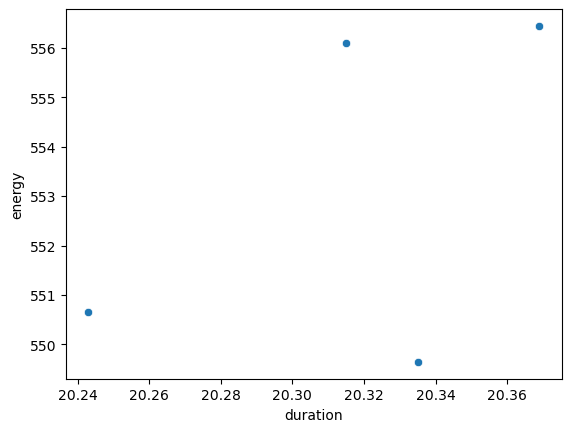

In [14]:
# first, we want to know how much energy is used for each number_of_messages

sns.scatterplot(data= dfs, x='duration',y='energy')

<Axes: xlabel='time', ylabel='payload'>

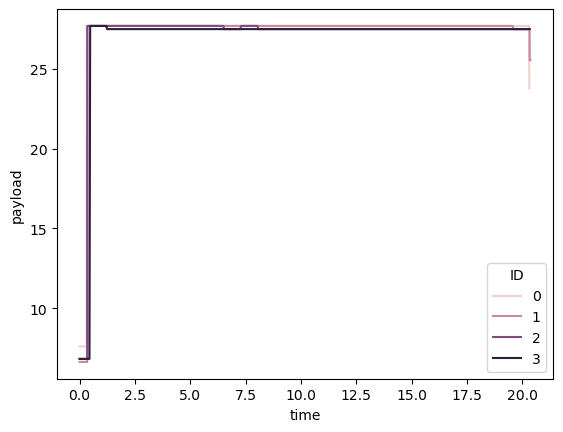

In [19]:
sns.lineplot(data=df_powers, x='time', y='payload',hue= 'ID')

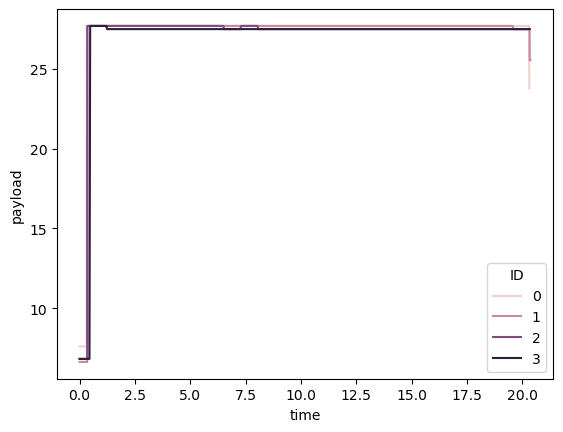

In [16]:
df_powers_groupbytest = df_powers.groupby('class')

for test_, df in df_powers_groupbytest:
    sns.lineplot(data=df, x='time', y='payload',hue= 'ID')
    plt.show()

<Axes: xlabel='timestamp', ylabel='payload'>

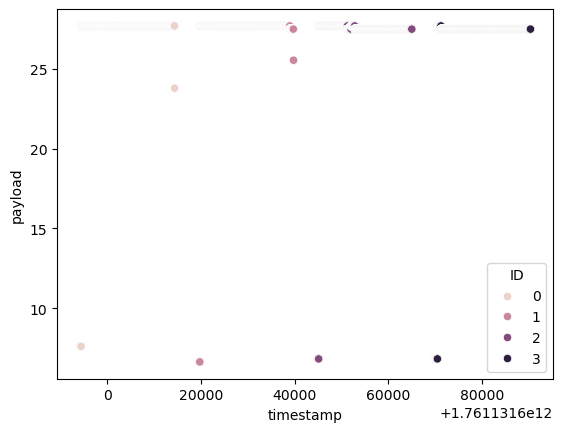

In [17]:
sns.scatterplot(
    data=df_powers,
    x='timestamp',
    y='payload', hue='ID'
)

# Insert your awesome analysis here